<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699">Brazil Data Cube Platform: Earth Observation data cubes and satellite image time series analysis</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Karine R. Ferreira, Gilberto R. Queiroz, Baggio L. C. Silva, Fabiana Ziotti, Raphael W. Costa, Rennan F. B. Marujo, Gabriel Sansigolo
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: Nov 01, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on some of the <em>Brazil Data Cube</em> services. Initially this notebooks illustrates a land cover classification by a traditional approach, which uses a single image in time to perform suppervised classification. Than, it is examplified the data cube approach, using the SpatioTemporal Asset Catalog (STAC) service to discover available images, the Web Time Series Service (WTSS) to extract time series, we run some examples, as cloud filtering, than, the Web Land Trajectory Service (WLTS) to analyse samples in different mapping projects and finally, the temporal information from the time series is used in a classification.
</div>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# Brazil Data Cube
<hr style="border:1px solid #0077b9;">

Remote sensing traditionally relied on single-scene approaches for classification. However, this practice has evolved significantly in recent years due to the high availability of data from various satellites and sensors and the processing capabilities of modern computers.

The use of time series in remote sensing has revolutionized the field by providing a dynamic and comprehensive perspective on environmental changes and land use patterns. Time series analysis involves the analysys of successive time intervals, allowing for the detection of trends, seasonal variations, and anomalies over time.

The volume of big data present both opportunities and challenges. On one hand, the availability of extensive datasets allows for more accurate and nuanced analyses. On the other hand, managing, processing, and analyzing such large datasets require advanced computational techniques and significant resources.

In this context, Earth Observation (EO) datacubes represent a powerful innovation in the field, offering a structured and multidimensional way to store, manage, and analyze large volumes of EO data. EO datacubes organize data in a three-dimensional grid, with spatial dimensions (latitude and longitude) and a temporal dimension (time), allowing for efficient and systematic access to time series data across various locations.

Brazil Data Cube (BDC) is a research, development and technological innovation project of the National Institute for Space Research (INPE), Brazil. It is producing data sets from big volumes of medium-resolution remote sensing images for the entire national territory and developing a computational platform to process and analyze these data sets using artificial intelligence, machine learning and image time series analysis.

The data sets produced in the BDC project include collections of analysis-ready data (ARD), multidimensional data cubes and mosaics from images of the CBERS-4/4A, Sentinel-2 and Landsat-8/9 satellites. The computational platform is composed of web services, software applications and iterative computing environments. Using artificial intelligence, machine learning, and image time series analysis, land use and land cover maps are being produced from these data cubes.

For more information on Brazil Data Cube, please see:

<a href="https://data.inpe.br/bdc/web/en/home-page-2/">BDC Website</a>

<a href="https://github.com/brazil-data-cube">BDC GitHub</a>

<a href="https://brazil-data-cube.github.io/">BDC GitHub IO</a>

<a href="https://data.inpe.br/stac/browser/?.language=en">INPE STAC Browser</a>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac.png?raw=true" align="right" width="66"/>

# **S**patio**T**emporal **A**sset **C**atalog (STAC)
<hr style="border:1px solid #0077b9;">

The [**S**patio**T**emporal **A**sset **C**atalog (STAC)](https://stacspec.org/) is a specification created through the colaboration of several organizations intended to increase satellite image search interoperability.

The diagram depicted in the picture contains the most important concepts behind the STAC data model:

<center>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-concept.png" width="480" />
<br/>
STAC model.
</center>

The description of the concepts below are adapted from the [STAC Specification](https://github.com/radiantearth/stac-spec):

- **Item**: a `STAC Item` is the atomic unit of metadata in STAC, providing links to the actual `assets` (including thumbnails) that they represent. It is a `GeoJSON Feature` with additional fields for things like time, links to related entities and mainly to the assets. According to the specification, this is the atomic unit that describes the data to be discovered in a `STAC Catalog` or `Collection`.

- **Asset**: a `spatiotemporal asset` is any file that represents information about the earth captured in a certain space and time.


- **Catalog**: provides a structure to link various `STAC Items` together or even to other `STAC Catalogs` or `Collections`.


- **Collection:** is a specialization of the `Catalog` that allows additional information about a spatio-temporal collection of data.

STAC Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [pystac-client](https://pystac-client.readthedocs.io/en/latest/). To install it from PyPI using `pip`, use the following command:

In [1]:
!pip install pystac-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.2 MB/s eta 0:00:00


In [2]:
!pip install shapely tqdm

In order to access the funcionalities of the client API, you should import the `stac` package, as follows:

In [3]:
import pystac_client

Then, create a `STAC` object attached to the Brazil Data Cube' STAC service:

In [5]:
service = pystac_client.Client.open('https://data.inpe.br/bdc/stac/v1/')

Listing the Available Data Products
<hr style="border:1px solid #0077b9;">

In the Jupyter environment, the `STAC` object will list the available image and data cube collections from the service:

In [6]:
for collection in service.get_collections():
    print(collection)

<CollectionClient id=myd13q1-6.1>
<CollectionClient id=mosaic-cbers4a-paraiba-3m-1>
<CollectionClient id=S2_L1C_BUNDLE-1>
<CollectionClient id=mosaic-landsat-sp-6m-1>
<CollectionClient id=mosaic-s2-paraiba-3m-1>
<CollectionClient id=mosaic-s2-yanomami_territory-6m-1>
<CollectionClient id=S2_L2A-1>
<CollectionClient id=GOES16-L2-CMI-1>
<CollectionClient id=sentinel-3-olci-l1-bundle-1>
<CollectionClient id=mosaic-s2-cerrado-2m-1>
<CollectionClient id=LANDSAT-16D-1>
<CollectionClient id=mosaic-landsat-amazon-3m-1>
<CollectionClient id=CBERS4-MUX-2M-1>
<CollectionClient id=CB4-MUX-L4-SR-1>
<CollectionClient id=S2-16D-2>
<CollectionClient id=mosaic-landsat-brazil-6m-1>
<CollectionClient id=sentinel-1-grd-bundle-1>
<CollectionClient id=mosaic-s2-amazon-3m-1>
<CollectionClient id=charter-wfi-1>
<CollectionClient id=mosaic-s2-cerrado-4m-1>
<CollectionClient id=mosaic-cbers4-brazil-3m-1>
<CollectionClient id=mod13q1-6.1>
<CollectionClient id=CB4A-WPM-PCA-FUSED-1>
<CollectionClient id=landsat-2>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-catalog.png?raw=true" align="right" width="300"/>

Retrieving the Metadata of a Collection
<hr style="border:1px solid #0077b9;">

The `collection` method returns information about a given image or data cube collection identified by its name. In this example we are retrieving information about the datacube collection `S2-16D-2`:

In [7]:
collection = service.get_collection('S2-16D-2')
collection

<CollectionClient id=S2-16D-2>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-item.png?raw=true" align="right" width="300"/>

Retrieving Items
<hr style="border:1px solid #0077b9;">

The `get_items` method returns the items of a given collection:

In [8]:
import folium

In [9]:
bbox = [-52.3625, -6.43, -52.3575, -6.425]

In [13]:
f = folium.Figure(width=1000, height=300) # Restrict figure size

# Create a folium map centered around the geographic area of interest
folium_map = folium.Map(location=[-6.41, -52.35], zoom_start=13)

folium.Rectangle(
    bounds=[[bbox[1],bbox[0]],[bbox[3],bbox[2]]],
    color="blue",
    weight=2,
    fill=True,
    fill_color="blue",
    fill_opacity=0.2
).add_to(folium_map)

folium_map

In order to support filtering rules through the specification of a rectangle (`bbox`) or a date and time (`datatime`) criterias, use the `Client.search(**kwargs)`:

In [14]:
item_search = service.search(bbox=bbox,
                             datetime='2020-01-01/2020-12-31',
                             collections=['S2-16D-2'])
item_search

The method `.search(**kwargs)` returns a `ItemSearch` representation which has handy methods to identify the matched results. For example, to check the number of items matched, use `.matched()`:

In [15]:
item_search.matched()

23

To iterate over the matched result, use `.get_items()` to traverse the list of items:

In [16]:
for item in item_search.items():
    print(item)

<Item id=S2-16D_V2_024012_20201218>
<Item id=S2-16D_V2_024012_20201202>
<Item id=S2-16D_V2_024012_20201116>
<Item id=S2-16D_V2_024012_20201031>
<Item id=S2-16D_V2_024012_20201015>
<Item id=S2-16D_V2_024012_20200929>
<Item id=S2-16D_V2_024012_20200913>
<Item id=S2-16D_V2_024012_20200828>
<Item id=S2-16D_V2_024012_20200812>
<Item id=S2-16D_V2_024012_20200727>
<Item id=S2-16D_V2_024012_20200711>
<Item id=S2-16D_V2_024012_20200625>
<Item id=S2-16D_V2_024012_20200609>
<Item id=S2-16D_V2_024012_20200524>
<Item id=S2-16D_V2_024012_20200508>
<Item id=S2-16D_V2_024012_20200422>
<Item id=S2-16D_V2_024012_20200406>
<Item id=S2-16D_V2_024012_20200321>
<Item id=S2-16D_V2_024012_20200305>
<Item id=S2-16D_V2_024012_20200218>
<Item id=S2-16D_V2_024012_20200202>
<Item id=S2-16D_V2_024012_20200117>
<Item id=S2-16D_V2_024012_20200101>


In [17]:
items = list(item_search.items())
items

[<Item id=S2-16D_V2_024012_20201218>,
 <Item id=S2-16D_V2_024012_20201202>,
 <Item id=S2-16D_V2_024012_20201116>,
 <Item id=S2-16D_V2_024012_20201031>,
 <Item id=S2-16D_V2_024012_20201015>,
 <Item id=S2-16D_V2_024012_20200929>,
 <Item id=S2-16D_V2_024012_20200913>,
 <Item id=S2-16D_V2_024012_20200828>,
 <Item id=S2-16D_V2_024012_20200812>,
 <Item id=S2-16D_V2_024012_20200727>,
 <Item id=S2-16D_V2_024012_20200711>,
 <Item id=S2-16D_V2_024012_20200625>,
 <Item id=S2-16D_V2_024012_20200609>,
 <Item id=S2-16D_V2_024012_20200524>,
 <Item id=S2-16D_V2_024012_20200508>,
 <Item id=S2-16D_V2_024012_20200422>,
 <Item id=S2-16D_V2_024012_20200406>,
 <Item id=S2-16D_V2_024012_20200321>,
 <Item id=S2-16D_V2_024012_20200305>,
 <Item id=S2-16D_V2_024012_20200218>,
 <Item id=S2-16D_V2_024012_20200202>,
 <Item id=S2-16D_V2_024012_20200117>,
 <Item id=S2-16D_V2_024012_20200101>]

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-asset.png?raw=true" align="right" width="300"/>

Assets
<hr style="border:1px solid #0077b9;">

The assets with the links to the images, thumbnails or specific metadata files, can be accessed through the property `assets` (from a given item):

In [18]:
assets = item.assets #Last item of the loop
assets

{'B01': <Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B01.tif>,
 'B02': <Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B02.tif>,
 'B03': <Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B03.tif>,
 'B04': <Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B04.tif>,
 'B05': <Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B05.tif>,
 'B06': <Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B06.tif>,
 'B07': <Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B07.tif>,
 'B08': <Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B08.tif>,
 'B09': <Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S

Then, from the assets it is possible to traverse or access individual elements:

The metadata related to the Sentinel-2/MSI blue band is available under the dictionary key `B02`:

In [19]:
blue_asset = assets['B02']
blue_asset

<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B02.tif>

To iterate in the item's assets, use the following pattern:

In [20]:
for asset in assets.values():
    print(asset)

<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B01.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B02.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B03.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B04.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B05.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B06.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B07.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B08.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B09.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-1

Retrieving Image Files
<hr style="border:1px solid #0077b9;">

Note that the URL for a given asset can be retrieved by the property `href`:

In [21]:
blue_asset.href

'https://data.inpe.br/bdc/data/s2-16d/v2/024/012/2020/01/01/S2-16D_V2_024012_20200101_B02.tif'

In [22]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 51.5 MB/s eta 0:00:00


In [23]:
%matplotlib inline

import numpy as np
import rasterio
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from pyproj import Transformer
from pyproj.crs import CRS
from rasterio.windows import bounds, from_bounds, Window
#se acessar a banda do azul o windows uma area deisnteresse dessa iamgem corta essa imagem mais leve

DataCubes generated by Brazil Data Cube use an Alber Equal Areas Projection ([see here](https://brazil-data-cube.github.io/specifications/bdc-projection.html)).

Here we define some auxiliar functions to help in this Jupyter Notebook.

- `normalize`: Normalizes image values (for visualization).

- `read_img`: Reads an image using window.

- `read_bdcimg_using_window_from_4326`: Reads parts (windows) of a BDC image using coordinates from EPSG 4326.

- `reproj_with_transform`: Reprojects a pair of EPSG 4326 (lat lon) coordinates to the projection used by BDC.

- `extract_samples`: extract the pixel values of a stack of images, given a set of coordinates pairs.

In [24]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

def read_img(uri: str, window: Window = None, masked: bool = True):
    """Read raster window as numpy.ma.masked_array."""
    with rasterio.open(uri) as src:
        return src.read(1, window=window, masked=masked)

def read_bdcimg_using_window_from_4326(uri: str, bbox, transformer):
    """Read raster window as numpy using EPSG:4326 to crop the window."""
    x1, y1, x2, y2 = bbox
    x1_reproj, y1_reproj = transformer.transform(x1, y1)
    x2_reproj, y2_reproj = transformer.transform(x2, y2)
    with rasterio.open(uri) as src:
        window = from_bounds(x1_reproj, y1_reproj, x2_reproj, y2_reproj, src.transform)
        rst = src.read(1, window=window)
        window_transform = src.window_transform(window)
        # window_bounds = bounds(window, src.transform)
    return rst, window_transform

def reproj_with_transform(coord, transformer):
    """Reprojects a pair of coordinates using a transform"""
    x, y = coord
    x_reproj, y_reproj = transformer.transform(x, y)
    return x_reproj, y_reproj

def extract_samples(band_stack, sample_coords, transformer, transform):
    """Extract pixel value of points"""
    # Reproject the sample coordinates
    reprojected_samples = [reproj_with_transform(sample, transformer) for sample in sample_coords]

    extracted_values = []
    for x_reproj, y_reproj in reprojected_samples:
        # Get the row and column indices of the sample in the raster
        row, col = ~transform * (x_reproj, y_reproj)
        row, col = int(row), int(col)

        # Ensure the row and column are within the bounds of the raster
        if 0 <= row < band_stack.shape[0] and 0 <= col < band_stack.shape[1]:
            # Extract the pixel values from the band stack at the given row and column
            sample_values = band_stack[row, col, :]
            extracted_values.append(sample_values)
        else:
            extracted_values.append([np.nan, np.nan, np.nan])  # Handle out-of-bounds appropriately

    return np.array(extracted_values)

Now let's suppose we don't want to use the entire image, only a part of it.

So we define a bounding box of the area of interest in order to open and visualize the RGB bands.

In [25]:
window_bbox = [-52.4, -6.5, -52.3, -6.4]

In [26]:
# Create the transformer
crs = rasterio.open(assets['B02'].href).crs
in_proj = CRS.from_epsg(4326)
out_proj = CRS.from_user_input(crs)
transformer = Transformer.from_crs(in_proj, out_proj, always_xy=True)

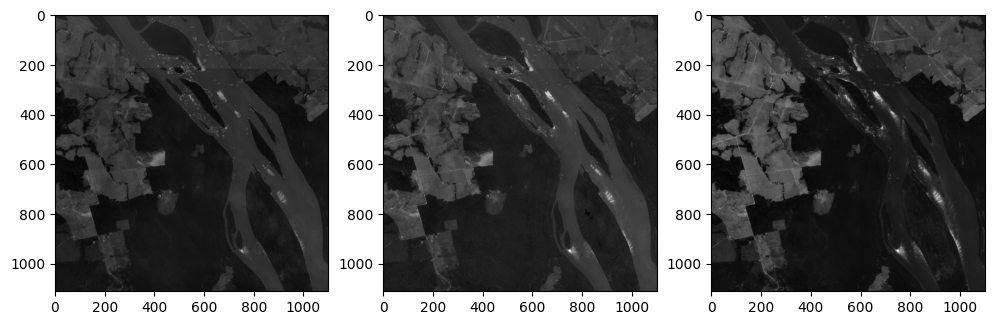

In [30]:
b02_image, window_transform = read_bdcimg_using_window_from_4326(items[7].assets['B02'].href, window_bbox, transformer)
b03_image, _ = read_bdcimg_using_window_from_4326(items[7].assets['B03'].href, window_bbox, transformer)
b04_image, _ = read_bdcimg_using_window_from_4326(items[7].assets['B04'].href, window_bbox, transformer)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(b02_image, cmap='gray')
ax2.imshow(b03_image, cmap='gray')
ax3.imshow(b04_image, cmap='gray')

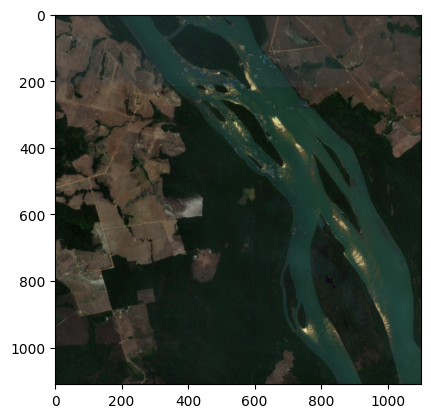

In [31]:
rgb_normalized_stack = np.dstack((normalize(b04_image), normalize(b03_image), normalize(b02_image)))
plt.imshow(rgb_normalized_stack)

# <span style="color:#336699">Web Land Trajectory Service (WLTS)

## <span style="color:#336699">Introduction to WLTS
<hr style="border:1px solid #0077b9;">

The **W**eb **L**and **T**rajectory **S**ervice (WLTS) is a web service designed to access and retrieve trajectories of land use and coverage from different type of data sources. Through a simple API, it brings the concept of Land Use and Cover Trajectories as a high level abstraction. Given a location and a time interval you can retrieve the land trajectory from many data collections, including information from the PRODES, DETER, and TerraClass projects.

`Figure 1` shows an example of representation of land use and cover trajectories extracted from a set of classified images, temporally ordered:


<center>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wlts/trajectory_def.png" width="600" />,
    <br/>
    <b>Figure 1</b> - Land use and cover Trajectory.
</center>

The WLTS introduces the following concepts:

- **Collections**: refers to a specific dataset from a given data source. A collection can be either represented by vector or raster structures. It has a time interval delimited by time (tmin, tmax). In this way, each Collection has an associated time attribute, which is aligned according to the time granularity of each project that makes the Collection available.

- **Class**: It is the label associated with a particular data item, which corresponds to the specific types of land use or cover, defined by the data source classification system. A Collection consists of a set of Class.

- **Trajectory**: Given a spatial location (x, y), a trajectory is represented by a set of observations that contains the land use and land cover class, the name of collection and time associated with an x, y location in space.

WLTS is based on three operations:

- ``list_collections``: returns the list of collections available in the service.

- ``describe_collection``: returns the metadata of a given data collection.

- ``trajectory``: returns the land use and cover trajectory from the collections given a location in space. The property result contains the feature identifier information, class, time, and the collection associated to the data item.

This Jupyter Notebook shows how to use the [Python Client Library](https://github.com/brazil-data-cube/wlts.py) for Web Land Trajectory Service.

Python Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [WLTS client for Python](https://github.com/brazil-data-cube/wlts.py).To install it from PyPI using pip, use the following command:

In [50]:
pip install git+https://github.com/brazil-data-cube/wlts.py@v1.0.1

  Cloning https://github.com/brazil-data-cube/wlts.py (to revision v1.0.1) to /tmp/pip-req-build-dytxr5mu
  Running command git clone --filter=blob:none --quiet https://github.com/brazil-data-cube/wlts.py /tmp/pip-req-build-dytxr5mu
  Running command git checkout -q cfbd23b0e7c7f97495ee363c22d0601061ee46d1
  Resolved https://github.com/brazil-data-cube/wlts.py to commit cfbd23b0e7c7f97495ee363c22d0601061ee46d1
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/brazil-data-cube/lccs.py (to revision v0.8.2) to /tmp/pip-install-uqh1l0iu/lccs_70bb4386c93e4092a354b51e5e244e1f
  Running command git clone --filter=blob:none --quiet https://github.com/brazil-data-cube/lccs.py /tmp/pip-install-uqh1l0iu/lccs_70bb4386c93e4092a354b51e5e244e1f
  Running command git checkout -q 41c9bd46a5806bf016fb63326464ad88336a8e37
  Resolved https://github.com/brazil-data-cube/lccs.py to commit 41c9bd46a5806bf016fb63326464ad88336a8e37
  Preparing metadata (setup.py) ... done


In [51]:
import wlts

WLTS is a client-server service. On the server-side, the data is stored, which is accessible through each of the API operations, described earlier. On the client-side (what this tutorial covers), you can use the operations and consume the data. In this tutorial, we will use the Python client to access the data. We need to define the URL where the WLTS server is operating. The code below defines the URL of the WLTS server. You should create a wlts object attached to a given service:

In [52]:
service = wlts.WLTS('https://data.inpe.br/bdc/wlts/v1')

Listing the Available Collections
<hr style="border:1px solid #0077b9;">

In WLTS, datasets that aggregate features from different classification systems, which various projects can generate, are represented through collections. Thus, the first operation presented is `list_collections`. This operation returns the list of all data collections that are available in the WLTS. In the  WLTS client for Python, this operation is used via the ``list_collections`` method which return a list of collection names:

In [53]:
service.collections

['prodes_pantanal',
 'ibge_cobertura_uso_terra',
 'deter_amazonia_legal',
 'prodes_pampa',
 'prodes_mata_atlantica',
 'deter_cerrado',
 'prodes_amazonia_legal',
 'prodes_caatinga',
 'prodes_cerrado',
 'lapig_areas_pastagem',
 'terraclass_cerrado',
 'terraclass_amazonia',
 'mapbiomas-v8']

Retrieving the Metadata of a collection
<hr style="border:1px solid #0077b9;">


Each collection is associated with a set of metadata that describes it. In WLTS a, there is the ``describe_collection`` operation, which allows the retrieval of this information. It is possible to access the metadata of a specific collection with the `operator[]`:

In [54]:
service['terraclass_amazonia']

Collection(service=wlts(url="https://data.inpe.br/bdc/wlts/v1"), metadata={'classification_system': {'id': '49', 'name': 'terraclass2020', 'title': 'TerraClass 2020', 'type': 'Feature', 'version': '1'}, 'collection_type': 'Image', 'datasource': {'host': 'https://data.inpe.br/bdc/geoserver/terraclass/ows', 'layers': [{'layer_name': 'terraclass-amazonia-v3', 'temporal_property': 'time', 'title': 'TerraClass AMZ 2008-2022', 'workspace': 'terraclass'}]}, 'deprecated': False, 'description': 'O Projeto TerraClass foi estruturado em 2010 com o objetivo de atender uma demanda do Governo Federal relacionada à qualificação dos desmatamentos observados na região da Amazônia Legal e endereçada a gestores e colaboradores da Empresa Brasileira de Pesquisa Agropecuária (Embrapa) e do Instituto Nacional de Pesquisas Espaciais (Inpe). Os produtos gerados pelo projeto TerraClass oferecem subsídios para a definição de ações governamentais referentes ao desenvolvimento da produção agrícola nacional com bases sustentáveis, à preservação da biodiversidade nacional e à manutenção da qualidade dos serviços ambientais. Em 2015, durante a expansão das ações do projeto para o bioma Cerrado, ano base 2013, foi publicada a Portaria MMA nº 365 de 27 de novembro de 2015, do Ministério do Meio Ambiente, criando o Programa de Monitoramento Ambiental dos Biomas Brasileiros (PMABB), que tem por objetivo expandir as ações de mapeamento e monitoramento para os demais biomas brasileiros.', 'detail': 'TerraClass possui dados Bianuais para : 2008, 2010, 2012, 2014, 2018, 2020 e 2022. Mais informacoes acesse: https://www.terraclass.gov.br/ e http://terrabrasilis.dpi.inpe.br/', 'is_public': True, 'name': 'terraclass_amazonia', 'period': {'end_date': '2022', 'start_date': '2008'}, 'spatial_extent': {'xmax': '-43.399292159', 'xmin': '-73.978322159', 'ymax': '5.269580833', 'ymin': '-16.661979167'}, 'temporal_resolution': {'unit': 'YEAR', 'value': 1}, 'title': 'TerraClass Amazônia'}

Retrieving the Trajectory
<hr style="border:1px solid #0077b9;">

In WLTS, since a collection is associated with a dataset with time variation, it is possible to retrieve the land use and land cover trajectory of a given point. The figure below illustrates this process.

<center>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wlts/traj1.png" width="750" />,
    <br/>
    <b>Figure 2</b> - WLTS trajectory extraction.
</center>

In order to retrieve the trajectory in the location of `latitude -12.0` and `longitude -54.0` use the `tj` method:

In [55]:
tj = service.tj(latitude=-12.0, longitude=-54.0, collections='mapbiomas-v8')

WLTS allows more than one collection to be accessed at the same time for the same point. By doing this, a trajectory for each project will be extracted. This way of operation is illustrated by the figure below.

<center>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wlts/traj2.png" width="750" />,
    <br/>
    <b>Figure 3</b> - WLTS trajectory extraction using multiple collections.
</center>

The names are entered in the collections parameter and must be separated by a comma. As an example, the code below retrieves the trajectories considering the collections ``mapbiomas_amazonia-v5`` and ``terraclass_amazonia.``

In [75]:
tj_multiples_collections = service.tj(latitude=-12.0, longitude=-54.0, collections='mapbiomas-v8,terraclass_amazonia')
tj_multiples_collections

{'query': {'collections': ['mapbiomas-v8', 'terraclass_amazonia'],
  'end_date': '',
  'geometry': '',
  'language': 'pt-br',
  'latitude': -12.0,
  'longitude': -54.0,
  'start_date': ''},
 'result': {'trajectory': [{'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1985',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1986',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1987',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1988',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1989',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1990',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1991',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1992',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1993',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1994',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1995',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1996',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1997',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1998',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '1999',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2000',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2001',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2002',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2003',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2004',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2005',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2006',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2007',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2008',
    'point_id': 1},
   {'class': 'Vegetação Natural Florestal Primária',
    'collection': 'terraclass_amazonia',
    'date': '2008',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2009',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2010',
    'point_id': 1},
   {'class': 'Vegetação Natural Florestal Primária',
    'collection': 'terraclass_amazonia',
    'date': '2010',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2011',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2012',
    'point_id': 1},
   {'class': 'Vegetação Natural Florestal Primária',
    'collection': 'terraclass_amazonia',
    'date': '2012',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2013',
    'point_id': 1},
   {'class': 'Formação Florestal',
    'collection': 'mapbiomas-v8',
    'date': '2014',
    'point_id': 1},
   {'class': 'Vegetação Natural Florestal Primária',
    'collection': 'terraclass_amazonia',
    'date': '2014',


It is possible to retrieve the land use and land cover trajectory of a multiples point. The code below illustrates this process.

In [57]:
tj_m = service.tj(latitude=[-8.485646, -12.0], longitude=[-56.869833, -54.0], collections='mapbiomas-v8')
tj_m

{'trajectories': [{'query': {'collections': ['mapbiomas-v8'],
    'end_date': '',
    'geometry': '',
    'language': 'pt-br',
    'latitude': -8.485646,
    'longitude': -56.869833,
    'start_date': ''},
   'result': {'trajectory': [{'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1985',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1986',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1987',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1988',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1989',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1990',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1991',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1992',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1993',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1994',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1995',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1996',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1997',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1998',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '1999',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2000',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2001',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2002',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2003',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2004',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2005',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2006',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2007',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2008',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2009',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2010',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2011',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2012',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2013',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2014',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2015',
      'point_id': 1},
     {'class': 'Formação Florestal',
      'collection': 'mapbiomas-v8',
      'date': '2016',
      'point_id': 1},
     {'class': 'Formação F

If you have Pandas installed, it is possible to plot the trajectory with the `df` method:

In [58]:
tj.df()

class    collection  date  point_id
0   Formação Florestal  mapbiomas-v8  1985         1
1   Formação Florestal  mapbiomas-v8  1986         1
2   Formação Florestal  mapbiomas-v8  1987         1
3   Formação Florestal  mapbiomas-v8  1988         1
4   Formação Florestal  mapbiomas-v8  1989         1
5   Formação Florestal  mapbiomas-v8  1990         1
6   Formação Florestal  mapbiomas-v8  1991         1
7   Formação Florestal  mapbiomas-v8  1992         1
8   Formação Florestal  mapbiomas-v8  1993         1
9   Formação Florestal  mapbiomas-v8  1994         1
10  Formação Florestal  mapbiomas-v8  1995         1
11  Formação Florestal  mapbiomas-v8  1996         1
12  Formação Florestal  mapbiomas-v8  1997         1
13  Formação Florestal  mapbiomas-v8  1998         1
14  Formação Florestal  mapbiomas-v8  1999         1
15  Formação Florestal  mapbiomas-v8  2000         1
16  Formação Florestal  mapbiomas-v8  2001         1
17  Formação Florestal  mapbiomas-v8  2002         1
18  Formação Florestal  mapbiomas-v8  2003         1
19  Formação Florestal  mapbiomas-v8  2004         1
20  Formação Florestal  mapbiomas-v8  2005         1
21  Formação Florestal  mapbiomas-v8  2006         1
22  Formação Florestal  mapbiomas-v8  2007         1
23  Formação Florestal  mapbiomas-v8  2008         1
24  Formação Florestal  mapbiomas-v8  2009         1
25  Formação Florestal  mapbiomas-v8  2010         1
26  Formação Florestal  mapbiomas-v8  2011         1
27  Formação Florestal  mapbiomas-v8  2012         1
28  Formação Florestal  mapbiomas-v8  2013         1
29  Formação Florestal  mapbiomas-v8  2014         1
30  Formação Florestal  mapbiomas-v8  2015         1
31  Formação Florestal  mapbiomas-v8  2016         1
32  Formação Florestal  mapbiomas-v8  2017         1
33  Formação Florestal  mapbiomas-v8  2018         1
34  Formação Florestal  mapbiomas-v8  2019         1
35  Formação Florestal  mapbiomas-v8  2020         1
36  Formação Florestal  mapbiomas-v8  2021         1
37  Formação Florestal  mapbiomas-v8  2022         1

## Obtaining Samples

<hr style="border:1px solid #0077b9;">

When we have a historic of images, we can use then for extracting time series.

This type of analysis allows the extraction of information presented over time that can be not seen when considering only the space.

Time series can be used to identify changes in trends, as well as cycles. For agricultural areas, it can be used to extract several phenological metrics.
Let's try a simple time series approach. First we will obtain the series from a set of points, we will calculate a spectral index. Obtain the class of each point given an existing project (IBGE and MapBiomas) and will perform a simple classification.

<center>
<img src="https://e-sensing.github.io/sitsbook/images/sits_general_view.png" width="500">

Example of Land use and Land Cover mapping workflow through time series approach ([SITS, 2024](https://e-sensing.github.io/sitsbook/introduction.html)).
</center>


In [59]:
import geopandas

Let's start by reading a shapefile.

You can open the shapefile directly from the .zip in your computer:

In [60]:
# zipfile = "sao-felix-do-xingu_utm_sqr_pts1km_subset80.zip"
# samples_df = geopandas.read_file(zipfile)
# samples_df.head()
para acessar uma shape carregar alguma amostra no caso o seguinte tem 80 pontos

You can also obtain it from an url:

In [61]:
import io
import os
import requests
import tempfile
import zipfile

zipfile_url = "https://github.com/brazil-data-cube/code-gallery/raw/master/jupyter/Data/wlts/sao-felix-do-xingu_utm_sqr_pts1km_subset80.zip"
response = requests.get(zipfile_url)
with tempfile.TemporaryDirectory() as tmpdir:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall(tmpdir)

        shp_file = [f for f in os.listdir(tmpdir) if f.endswith('.shp')][0]
        shp_path = os.path.join(tmpdir, shp_file)

        samples_df = geopandas.read_file(shp_path)

samples_df

id                    geometry
0    934  POINT (-52.40123 -6.37311)
1    935  POINT (-52.39219 -6.37314)
2    936  POINT (-52.38315 -6.37316)
3    937  POINT (-52.37411 -6.37318)
4    938  POINT (-52.36507 -6.37321)
..   ...                         ...
75  1541   POINT (-52.3562 -6.43654)
76  1542  POINT (-52.34716 -6.43656)
77  1543  POINT (-52.33812 -6.43658)
78  1544  POINT (-52.32908 -6.43661)
79  1545  POINT (-52.32004 -6.43663)

[80 rows x 2 columns]

We can see how many points we have by:

In [62]:
len(samples_df)

80

Now let's visualize the points

In [63]:
import folium
from shapely.geometry import Point, MultiPoint

f = folium.Figure(width=1000, height=300) # Restrict figure size

# Create a folium map centered around the geographic area of interest
folium_map = folium.Map(location=[-6.41, -52.35], zoom_start=13)

for _, row in samples_df.iterrows():
    point = row['geometry']
    folium.CircleMarker(
        location=(point.y, point.x),
        radius=2,
        color='gray',
        fill=True,
        fill_color='gray',
        fill_opacity=0.5,
        popup='Sample'
    ).add_to(folium_map)

folium_map

Obtain point labels using WLTS
<hr style="border:1px solid #0077b9;">

In [76]:
#pip install git+https://github.com/brazil-data-cube/wlts.py@v1.0.1
import wlts
service = wlts.WLTS('https://data.inpe.br/bdc/wlts/v1')

**IBGE - Monitoramento e uso da Terra (2020)**

In WLTS, the collection with IBGE data from the Land Use Monitoring project is in the collection named `ibge_land_use_cover`. The code below extracts the label of this collection in the year 2020.

In [77]:
import pandas as pd

samples_ibge = []

# Extract classes with WLTS
for point_row in samples_df.iterrows():
    point_row = point_row[1]

    ibge_class = service.tj(latitude  = float(point_row.geometry.y),
                            longitude = float(point_row.geometry.x),
                            start_date = 2020, end_date = 2020,
                            collections = "ibge_cobertura_uso_terra")

    samples_ibge.append(ibge_class.df())

# Create a Data Frame
samples_ibge = pd.concat(samples_ibge).reset_index(drop=True)
samples_ibge["geometry"] = samples_df["geometry"]
samples_ibge.head()

class                collection  date  point_id  \
0       Vegetação Florestal  ibge_cobertura_uso_terra  2020         1   
1  Corpo d'água Continental  ibge_cobertura_uso_terra  2020         1   
2  Corpo d'água Continental  ibge_cobertura_uso_terra  2020         1   
3       Pastagem com Manejo  ibge_cobertura_uso_terra  2020         1   
4       Vegetação Florestal  ibge_cobertura_uso_terra  2020         1   

                     geometry  
0  POINT (-52.40123 -6.37311)  
1  POINT (-52.39219 -6.37314)  
2  POINT (-52.38315 -6.37316)  
3  POINT (-52.37411 -6.37318)  
4  POINT (-52.36507 -6.37321)

Analogous to the IBGE data, this section extracts the data from MapBiomas. In WLTS, the data from MapBiomas (Version 8) are represented through the collection `mapbiomas-v8`.

In [78]:
samples_mapbiomas = []

# Extract classes with WLTS
for point_row in samples_df.iterrows():
    point_row = point_row[1]

    mapbiomas_class = service.tj(latitude  = float(point_row.geometry.y),
                                 longitude = float(point_row.geometry.x),
                                 start_date = 2020,
                                 end_date = 2020,
                                 collections = "mapbiomas-v8")

    samples_mapbiomas.append(mapbiomas_class.df())

# Create a Data Frame
samples_mapbiomas = pd.concat(samples_mapbiomas).reset_index(drop=True)
samples_mapbiomas["geometry"] = samples_df["geometry"]
samples_mapbiomas.head()

class    collection  date  point_id  \
0  Formação Florestal  mapbiomas-v8  2020         1   
1  Rio, Lago e Oceano  mapbiomas-v8  2020         1   
2  Rio, Lago e Oceano  mapbiomas-v8  2020         1   
3            Pastagem  mapbiomas-v8  2020         1   
4  Formação Florestal  mapbiomas-v8  2020         1   

                     geometry  
0  POINT (-52.40123 -6.37311)  
1  POINT (-52.39219 -6.37314)  
2  POINT (-52.38315 -6.37316)  
3  POINT (-52.37411 -6.37318)  
4  POINT (-52.36507 -6.37321)

### Prepare data to Water concordance analysis
<hr style="border:1px solid #0077b9;">

This section prepares the data for the concordance analysis. In this process, all points identified as water have their path values converted to `1`, while all other values are represented by `0`.

This conversion is applied considering that there is one class that represents the Water element for each collection. The table below summarizes how each collection does this representation.

|       **Collection**       | **Nomenclature for Water Class**   |
|:--------------------------:|:----------------------------------:|
|        IBGE (2020)         | Corpo d'água Continental           |
| MapBiomas Versão 8 (2020)  | Rio, Lago e Oceano                 |


Considering the information in the table, below each of the collections is prepared for classification.

**IBGE Collection (2020)**
> After running the command below, notice that the `class` column has its value summed to the values `0` and `1`.

In [67]:
samples_ibge.loc[samples_ibge["class"] != "Corpo d'água Continental", "is_water"] = False
samples_ibge.loc[samples_ibge["class"] == "Corpo d'água Continental", "is_water"] = True
samples_ibge.head(3)

class                collection  date  point_id  \
0       Vegetação Florestal  ibge_cobertura_uso_terra  2020         1   
1  Corpo d'água Continental  ibge_cobertura_uso_terra  2020         1   
2  Corpo d'água Continental  ibge_cobertura_uso_terra  2020         1   

                     geometry is_water  
0  POINT (-52.40123 -6.37311)    False  
1  POINT (-52.39219 -6.37314)     True  
2  POINT (-52.38315 -6.37316)     True

**MapBiomas Collection (2020)**

In [68]:
samples_mapbiomas.loc[samples_mapbiomas["class"] != "Rio, Lago e Oceano", "is_water"] = False
samples_mapbiomas.loc[samples_mapbiomas["class"] == "Rio, Lago e Oceano", "is_water"] = True
samples_mapbiomas.head(3)

class    collection  date  point_id  \
0  Formação Florestal  mapbiomas-v8  2020         1   
1  Rio, Lago e Oceano  mapbiomas-v8  2020         1   
2  Rio, Lago e Oceano  mapbiomas-v8  2020         1   

                     geometry is_water  
0  POINT (-52.40123 -6.37311)    False  
1  POINT (-52.39219 -6.37314)     True  
2  POINT (-52.38315 -6.37316)     True

### Concordance analysis
<hr style="border:1px solid #0077b9;">

Below we will generate an example of a concordance analysis. A confusion matrix is generated to visualize and quantify the points that have a concordance. After visualizing the matrix, the data is filtered so that only the points where there is concordance are considered.

> **Note**: The analysis below does not consider many of the practical complexities involved in this process.

In [69]:
import seaborn
from sklearn.metrics import confusion_matrix

In [70]:
# generate the confusion matrix

cm_arr = confusion_matrix(samples_ibge["is_water"].astype("int"), samples_mapbiomas["is_water"].astype("int"))

# formating results
reference = ["Non-Water", "Water"]

cm_pd = pd.DataFrame(cm_arr, columns = reference, index = reference)

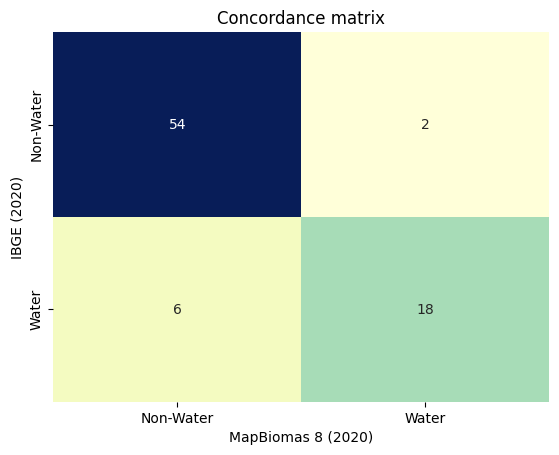

In [71]:
from matplotlib import pyplot as plt

plt.figure(dpi = 100)

# plot matrix
seaborn.heatmap(cm_pd, annot=True, fmt = 'g', cmap="YlGnBu", cbar = False)

# configure labels
plt.title("Concordance matrix")
plt.ylabel("IBGE (2020)")
plt.xlabel("MapBiomas 8 (2020)")

plt.show()

> Below, the samples are filtered considering the equality between both data sets

In [72]:
import numpy as np

# generate the "water concordance matrix" based on classes matching
both_true = (samples_ibge['is_water'] & samples_mapbiomas['is_water'])
both_false = (~samples_ibge['is_water'] & ~samples_mapbiomas['is_water'])
mapbiomas_true_ibge_false = (~samples_ibge['is_water'] & samples_mapbiomas['is_water'])
ibge_true_mapbiomas_false = (samples_ibge['is_water'] & ~samples_mapbiomas['is_water'])

conditions = [mapbiomas_true_ibge_false, ibge_true_mapbiomas_false, both_true, both_false]
choices = [2, 2, 1, 0]

water_concordance = np.select(conditions, choices, default=-1)
water_concordance

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

**Visualizing the filtered points in the geographical space**

The map below shows the filtered samples. The blue samples represent the concordant elements. On the other hand, the yellow ones are the points where the ready did not agree.

In [73]:
samples_df['Label'] = np.where(water_concordance == 0, "Nao Agua", np.where(water_concordance == 1, "Agua", "Talvez Agua"))
samples_df

id                    geometry     Label
0    934  POINT (-52.40123 -6.37311)  Nao Agua
1    935  POINT (-52.39219 -6.37314)      Agua
2    936  POINT (-52.38315 -6.37316)      Agua
3    937  POINT (-52.37411 -6.37318)  Nao Agua
4    938  POINT (-52.36507 -6.37321)  Nao Agua
..   ...                         ...       ...
75  1541   POINT (-52.3562 -6.43654)  Nao Agua
76  1542  POINT (-52.34716 -6.43656)      Agua
77  1543  POINT (-52.33812 -6.43658)      Agua
78  1544  POINT (-52.32908 -6.43661)      Agua
79  1545  POINT (-52.32004 -6.43663)      Agua

[80 rows x 3 columns]

In [74]:
# create folium map
folium_map = folium.Map(location=[-6.41, -52.35], zoom_start=13)

# Google Satellite Layer
tile = folium.TileLayer(
        tiles = "https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}",
        attr = 'Google',
        name = 'Google Satellite',
        overlay = False,
        control = True
       ).add_to(folium_map)

# colors for points
color = {
    'Agua': '#43d9de',
    'Nao Agua': '#008000',
    'Talvez Agua': '#F5AD46'
}
# add marker to map (concordance samples)
for index, row in samples_df.iterrows():
    folium.CircleMarker(location=[row['geometry'].y, row['geometry'].x],
                        fill=True,
                        fill_color=color[row['Label']],
                        color='black',
                        fill_opacity=0.6,
                        radius=9).add_to(folium_map)
folium_map

# <span style="color:#336699">Web Time Series Service (WTSS)

## <span style="color:#336699">Introduction to WTSS
<hr style="border:1px solid #0077b9;">

The **W**eb **T**ime **S**eries **S**ervice (WTSS) is a lightweight web service for handling time series data from remote sensing imagery. Given a location and a time interval you can retrieve the according time series as a list of real values.


In WTSS a coverage is a three dimensional array associated to spatial and temporal reference systems.

WTSS is based on three operations:

- ``list_coverages``: returns the list of all available coverages in the service.

- ``describe_coverage``: returns the metadata of a given coverage.

- ``time_series``: query the database for the list of values for a given location and time interval.

This Jupyter Notebook shows how to use WTSS in Python with Brazil Data Cube data.

This service is composed by three operations (Figure 2):

<div align="center">
    <figcaption><strong>Figure 2</strong> - WTSS Operations</figcaption>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/wtss-operations.png?raw=true" align="center" width="768"/>
    <br>
    <strong>Source</strong>: Adapted from <i>et al.</i> (2017)
</div>

- ``list_coverages``: Lists the available *coverages* names on the service;

- ``describe_coverage``: recovers the metadata of a *coverage*;

- ``time_series``: Extracts time series from a *coverage* given a location on time and space.

> The complete description of the input and output formats of each operation are detailed in [WTSS OpenAPI 3.0 specification](https://github.com/brazil-data-cube/wtss-spec).

> You can also consult the WTSS clients for [Python](https://github.com/brazil-data-cube/wtss.py) and [R](https://github.com/e-sensing/Rwtss).

Python Client API
<hr style="border:1px solid #0077b9;">

In [79]:
!pip install wtss==2.0.0a3

In [80]:
!pip install geopandas numpy matplotlib

^C


Connect to WTSS server
<hr style="border:1px solid #0077b9;">

In [81]:
from wtss import WTSS
import os

service = WTSS('https://data.inpe.br/bdc/wtss/v4/')
service

wtss(url="https://data.inpe.br/bdc/wtss/v4/",validate=False,access_token=None)

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/list-coverages.png?raw=true" align="right" width="220"/>

Listing the Available Data Products
<hr style="border:1px solid #0077b9;">

The object `service` allows to list the available coverages:

In [82]:
service.coverages

['CBERS4-MUX-2M-1',
 'CBERS4-WFI-16D-2',
 'CBERS-WFI-8D-1',
 'LANDSAT-16D-1',
 'mod13q1-6.1',
 'myd13q1-6.1',
 'S2-16D-2']

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/time-series.png?raw=true" align="right" width="220"/>

Retrieving the Time Series
<hr style="border:1px solid #0077b9;">

In order to retrieve the time series for attributes `red` and `nir`, in the location of `latitude -12` and `longitude -54` from `January 1st, 2019` to `December 31st, 2019`, use the `ts` method:

In [83]:
coverage = service['S2-16D-2']
coverage

Coverage Name: S2-16D-2
 
 
 
 Description: Earth Observation Data Cube generated from Copernicus Sentinel-2/MSI Level-2A product over Brazil. This dataset is provided in Cloud Optimized GeoTIFF (COG) file format. The dataset is processed with 10 meters of spatial resolution, reprojected and cropped to BDC_SM grid Version 2 (BDC_SM V2), considering a temporal compositing function of 16 days using the Least Cloud Cover First (LCF) best pixel approach.
 
 
 
 Attributes: 
 
 
 
 
 
 
 name 
 common name 
 description 
 min 
 max 
 nodata 
 scale 
 center_wavelength 
 full_width_half_max 
 data_type 
 
 
 CLEAROB 
 ClearOb 
 
 
 
 0.0 
 1.0 
 
 
 uint8 
 
 TOTALOB 
 TotalOb 
 
 
 
 0.0 
 1.0 
 
 
 uint8 
 
 PROVENANCE 
 Provenance 
 
 
 
 -1.0 
 1.0 
 
 
 int16 
 
 SCL 
 quality 
 
 
 
 0.0 
 1.0 
 
 
 uint8 
 
 B01 
 coastal 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B02 
 blue 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B04 
 red 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B05 
 rededge 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B06 
 rededge 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B07 
 rededge 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B08 
 nir 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B8A 
 nir08 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B09 
 nir09 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B03 
 green 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B11 
 swir16 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B12 
 swir22 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 EVI 
 evi 
 
 
 
 -9999.0 
 0.0001 
 
 
 int16 
 
 NDVI 
 ndvi 
 
 
 
 -9999.0 
 0.0001 
 
 
 int16 
 
 NBR 
 nbr 
 
 
 
 -9999.0 
 0.0001 
 
 
 int16 
 
 
 
 
 
 Extent 
 
 
 
 
 xmin 
 ymin 
 xmax 
 ymax 
 
 
 -74.871069 
 -34.67556459214432 
 -28.006208041654325 
 5.763264005526926 
 
 
 
 
 
 Timeline 
 
 
 2018-01-01 2018-01-17 2018-02-02 2018-02-18 2018-03-06 2018-03-22 2018-04-07 2018-04-23 2018-05-09 2018-05-25 2018-06-10 2018-06-26 2018-07-12 2018-07-28 2018-08-13 2018-08-29 2018-09-14 2018-09-30 2018-10-16 2018-11-01 2018-11-17 2018-12-03 2018-12-19 2019-01-01 2019-01-17 2019-02-02 2019-02-18 2019-03-06 2019-03-22 2019-04-07 2019-04-23 2019-05-09 2019-05-25 2019-06-10 2019-06-26 2019-07-12 2019-07-28 2019-08-13 2019-08-29 2019-09-14 2019-09-30 2019-10-16 2019-11-01 2019-11-17 2019-12-03 2019-12-19 2020-01-01 2020-01-17 2020-02-02 2020-02-18 2020-03-05 2020-03-21 2020-04-06 2020-04-22 2020-05-08 2020-05-24 2020-06-09 2020-06-25 2020-07-11 2020-07-27 2020-08-12 2020-08-28 2020-09-13 2020-09-29 2020-10-15 2020-10-31 2020-11-16 2020-12-02 2020-12-18 2021-01-01 2021-01-17 2021-02-02 2021-02-18 2021-03-06 2021-03-22 2021-04-07 2021-04-23 2021-05-09 2021-05-25 2021-06-10 2021-06-26 2021-07-12 2021-07-28 2021-08-13 2021-08-29 2021-09-14 2021-09-30 2021-10-16 2021-11-01 2021-11-17 2021-12-03 2021-12-19 2022-01-01 2022-01-17 2022-02-02 2022-02-18 2022-03-06 2022-03-22 2022-04-07 2022-04-23 2022-05-09 2022-05-25 2022-06-10 2022-06-26 2022-07-12 2022-07-28 2022-08-13 2022-08-29 2022-09-14 2022-09-30 2022-10-16 2022-11-01 2022-11-17 2022-12-03 2022-12-19 2023-01-01 2023-01-17 2023-02-02 2023-02-18 2023-03-06 2023-03-22 2023-04-07 2023-04-23 2023-05-09 2023-05-25 2023-06-10 2023-06-26 2023-07-12 2023-07-28 2023-08-13 2023-08-29 2023-09-14 2023-09-30 2023-10-16 2024-02-18 2024-01-17 2024-01-01 2023-11-01 2023-11-17 2023-12-03 2023-12-19 2024-02-02 2024-03-05 2017-06-26 2017-01-01 2017-02-18 2017-12-03 2017-05-25 2017-08-29 2017-04-07 2017-10-16 2017-01-17 2017-09-30 2017-02-02 2017-11-17 2017-07-28 2017-12-19 2017-06-10 2017-05-09 2017-03-06 2017-04-23 2017-08-13 2017-09-14 2017-07-12 2017-11-01 2017-03-22 2024-03-21 2024-04-22 2024-04-06 2024-05-24 2024-05-08 2024-06-09 2024-06-25 2024-07-11 2024-07-27 2024-08-12 2024-08-28 2024-09-13 2024-09-29 2024-10-15

In [84]:
time_series = coverage.ts(attributes=(['B04', 'B08']),
                 latitude=-9.41866, longitude=-61.46103,
                 start_date='2019-01-01', end_date='2019-12-31')

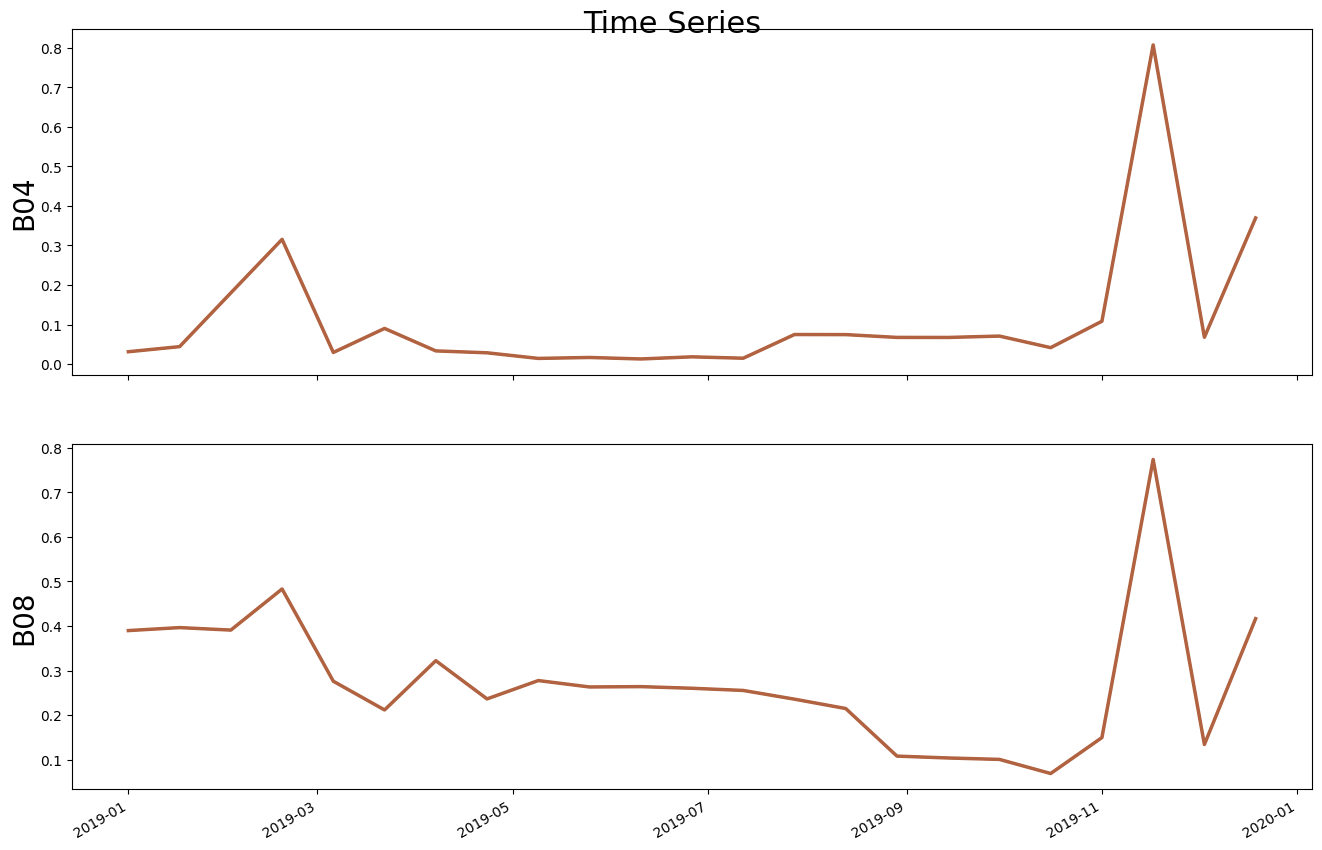

In [85]:
time_series.plot()

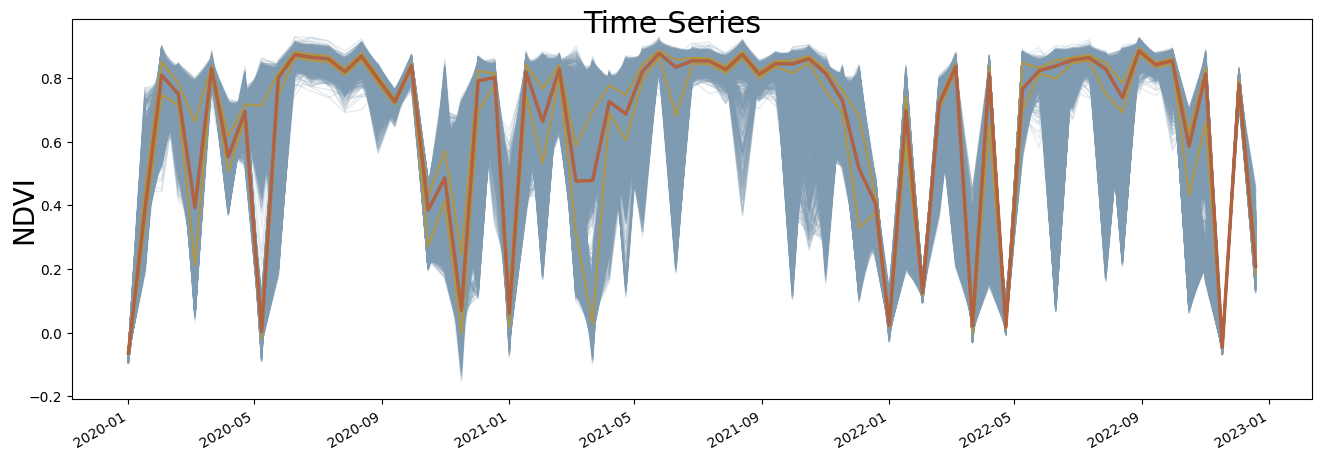

In [97]:
import shapely.geometry

timeseries = coverage.ts(attributes=(['NDVI']),
                         geom=shapely.geometry.box(-59.60, -5.69, -59.59, -5.68),
                         start_datetime="2020-01-01", end_datetime="2022-12-31")
timeseries.plot()

## Extracting Time Series for samples and for classification
<hr style="border:1px solid #0077b9;">

Now let's suppose we want to classify the following area:

In [98]:
bbox = [-6.43, -52.3625, -6.425, -52.3575]
center_lat = (bbox[0] + bbox[2]) / 2
center_lon = (bbox[1] + bbox[3]) / 2

# Create a folium map centered around the geographic area of interest
folium.Rectangle(
    bounds=[[bbox[0], bbox[1]], [bbox[2], bbox[3]]],
    color='blue',
    fill=True,
    fill_opacity=0.2
).add_to(folium_map)
folium_map

We can extract all time series within its bounding box using WTSS and use it as a dataframe:

In [106]:
import shapely.geometry

attributes = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'EVI', 'NDVI', 'NBR']
bands_and_cloudmask = attributes + ['SCL']

study_area_ts = coverage.ts(attributes=(bands_and_cloudmask),
                          geom=shapely.geometry.box(bbox[1], bbox[0], bbox[3], bbox[2]),
                          start_date='2022-01-01', end_date='2022-12-31')
study_area_df = study_area_ts.df()
study_area_df

attribute                    geometry   value   datetime
0             B01    POINT (-52.36249 -6.425)  0.6132 2022-01-01
1             B01    POINT (-52.36249 -6.425)  0.0308 2022-01-17
2             B01    POINT (-52.36249 -6.425)  0.3123 2022-02-02
3             B01    POINT (-52.36249 -6.425)  0.4139 2022-02-18
4             B01    POINT (-52.36249 -6.425)  0.0834 2022-03-06
...           ...                         ...     ...        ...
1125339       SCL  POINT (-52.35753 -6.42999)  0.0000 2022-10-16
1125340       SCL  POINT (-52.35753 -6.42999)  8.0000 2022-11-01
1125341       SCL  POINT (-52.35753 -6.42999)  9.0000 2022-11-17
1125342       SCL  POINT (-52.35753 -6.42999)  8.0000 2022-12-03
1125343       SCL  POINT (-52.35753 -6.42999)  9.0000 2022-12-19

[1125344 rows x 4 columns]

We can improve how the data is organized in the dataframe.
> ⚠️ **Atention:** This will be improved in the next version of WTSS!

In [107]:
def organize_df(my_df):
    #Move attributes to columns
    df_pivot = my_df.pivot_table(index=['geometry', 'datetime'],
                           columns='attribute',
                           values='value').reset_index()
    #Group by points
    df_grouped = df_pivot.groupby('geometry').agg(lambda x: list(x)).reset_index()
    #Transform cells to numpy.arrays or pandas.Series
    columns_to_convert = df_grouped.columns.difference(['geometry'])
    df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)
    return df_grouped

In [108]:
study_area_df = organize_df(study_area_df)
study_area_df

<ipython-input-107-db59a7023b91>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


attribute                    geometry  \
0          POINT (-52.36246 -6.42992)   
1          POINT (-52.36237 -6.42992)   
2          POINT (-52.36246 -6.42984)   
3          POINT (-52.36246 -6.42975)   
4          POINT (-52.36237 -6.42975)   
...                               ...   
3053       POINT (-52.35753 -6.42981)   
3054        POINT (-52.35753 -6.4299)   
3055        POINT (-52.35762 -6.4299)   
3056       POINT (-52.35762 -6.42999)   
3057       POINT (-52.35753 -6.42999)   

attribute                                           datetime  \
0          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
1          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
2          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
4          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
...                                                      ...   
3053       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3054       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3055       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3056       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3057       0    2022-01-01
1    2022-01-17
2    2022-02-0...   

attribute                                                B01  \
0          0     0.4953
1     0.0208
2     0.2595
3     0...   
1          0     0.4985
1     0.0210
2     0.2532
3     0...   
2          0     0.4954
1     0.0211
2     0.2633
3     0...   
3          0     0.4948
1     0.0215
2     0.2679
3     0...   
4          0     0.4986
1     0.0216
2     0.2620
3     0...   
...                                                      ...   
3053       0     0.4335
1     0.0214
2     0.1245
3     0...   
3054       0     0.4206
1     0.0211
2     0.1231
3     0...   
3055       0     0.4213
1     0.0206
2     0.1224
3     0...   
3056       0     0.4084
1     0.0202
2     0.1205
3     0...   
3057       0     0.4077
1     0.0208
2     0.1217
3     0...   

attribute                                                B02  \
0          0     0.4652
1     0.0200
2     0.3042
3     0...   
1          0     0.4791
1     0.0199
2     0.2971
3     0...   
2          0     0.4631
1     0.0196
2     0.3006
3     0...   
3          0     0.4631
1     0.0199
2     0.3045
3     0...   
4          0     0.4751
1     0.0219
2     0.3029
3     0...   
...                                                      ...   
3053       0     0.4998
1     0.0294
2     0.1228
3     0...   
3054       0     0.4928
1     0.0296
2     0.1285
3     0...   
3055       0     0.4958
1     0.0279
2     0.1302
3     0...   
3056       0     0.4918
1     0.0281
2     0.1356
3     0...   
3057       0     0.4906
1     0.0291
2     0.1306
3     0...   

attribute                                                B03  \
0          0     0.4599
1     0.0250
2     0.2767
3     0...   
1          0     0.4687
1     0.0241
2     0.2735
3     0...   
2          0     0.4585
1     0.0263
2     0.2848
3     0...   
3          0     0.4516
1     0.0281
2     0.2887
3     0...   
4          0     0.4616
1     0.0255
2     0.2864
3     0...   
...                                                      ...   
3053       0     0.4696
1     0.0367
2     0.1365
3     0...   
3054       0     0.4606
1     0.0375
2     0.1351
3     0...   
3055       0     0.4687
1     0.0350
2     0.1412
3     0...   
3056       0     0.4585
1     0.0353
2     0.1397
3     0...   
3057       0     0.4511
1     0.0375
2     0.1339
3     0...   

attribute                                                B04  \
0          0     0.4292
1     0.0130
2     0.2339
3     0...   
1          0     0.4397
1     0.0129
2     0.2284
3     0...   
2          0     0.4305
1     0.0138
2     0.2400
3     0...   
3          0     0.4289
1     0.0146
2     0.2499
3     0...   
4          0     0.4389
1     0.0138
2     0.2471
3     0...   
...                                            

We can see that we have time series for a total of points equals to:

In [109]:
len(study_area_df)

3058

# Applications



## Calculating a spectral index
<hr style="border:1px solid #0077b9;">

Now suppose we want to generate a new spectral index for our data:

In [110]:
study_area_df['NDWI'] = ((study_area_df['B03'] - study_area_df['B05']) / (study_area_df['B03'] + study_area_df['B05']))
study_area_df

attribute                    geometry  \
0          POINT (-52.36246 -6.42992)   
1          POINT (-52.36237 -6.42992)   
2          POINT (-52.36246 -6.42984)   
3          POINT (-52.36246 -6.42975)   
4          POINT (-52.36237 -6.42975)   
...                               ...   
3053       POINT (-52.35753 -6.42981)   
3054        POINT (-52.35753 -6.4299)   
3055        POINT (-52.35762 -6.4299)   
3056       POINT (-52.35762 -6.42999)   
3057       POINT (-52.35753 -6.42999)   

attribute                                           datetime  \
0          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
1          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
2          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
4          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
...                                                      ...   
3053       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3054       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3055       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3056       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3057       0    2022-01-01
1    2022-01-17
2    2022-02-0...   

attribute                                                B01  \
0          0     0.4953
1     0.0208
2     0.2595
3     0...   
1          0     0.4985
1     0.0210
2     0.2532
3     0...   
2          0     0.4954
1     0.0211
2     0.2633
3     0...   
3          0     0.4948
1     0.0215
2     0.2679
3     0...   
4          0     0.4986
1     0.0216
2     0.2620
3     0...   
...                                                      ...   
3053       0     0.4335
1     0.0214
2     0.1245
3     0...   
3054       0     0.4206
1     0.0211
2     0.1231
3     0...   
3055       0     0.4213
1     0.0206
2     0.1224
3     0...   
3056       0     0.4084
1     0.0202
2     0.1205
3     0...   
3057       0     0.4077
1     0.0208
2     0.1217
3     0...   

attribute                                                B02  \
0          0     0.4652
1     0.0200
2     0.3042
3     0...   
1          0     0.4791
1     0.0199
2     0.2971
3     0...   
2          0     0.4631
1     0.0196
2     0.3006
3     0...   
3          0     0.4631
1     0.0199
2     0.3045
3     0...   
4          0     0.4751
1     0.0219
2     0.3029
3     0...   
...                                                      ...   
3053       0     0.4998
1     0.0294
2     0.1228
3     0...   
3054       0     0.4928
1     0.0296
2     0.1285
3     0...   
3055       0     0.4958
1     0.0279
2     0.1302
3     0...   
3056       0     0.4918
1     0.0281
2     0.1356
3     0...   
3057       0     0.4906
1     0.0291
2     0.1306
3     0...   

attribute                                                B03  \
0          0     0.4599
1     0.0250
2     0.2767
3     0...   
1          0     0.4687
1     0.0241
2     0.2735
3     0...   
2          0     0.4585
1     0.0263
2     0.2848
3     0...   
3          0     0.4516
1     0.0281
2     0.2887
3     0...   
4          0     0.4616
1     0.0255
2     0.2864
3     0...   
...                                                      ...   
3053       0     0.4696
1     0.0367
2     0.1365
3     0...   
3054       0     0.4606
1     0.0375
2     0.1351
3     0...   
3055       0     0.4687
1     0.0350
2     0.1412
3     0...   
3056       0     0.4585
1     0.0353
2     0.1397
3     0...   
3057       0     0.4511
1     0.0375
2     0.1339
3     0...   

attribute                                                B04  \
0          0     0.4292
1     0.0130
2     0.2339
3     0...   
1          0     0.4397
1     0.0129
2     0.2284
3     0...   
2          0     0.4305
1     0.0138
2     0.2400
3     0...   
3          0     0.4289
1     0.0146
2     0.2499
3     0...   
4          0     0.4389
1     0.0138
2     0.2471
3     0...   
...                                            

## Removing clouds from Time Series
<hr style="border:1px solid #0077b9;">

When we work with satellite image time series there are external influences that can bring noise to the values of the series, distorting them. A common example of noise is the observation of clouds, which change the spectral behavior of targets, making them often unidentifiable. In Figure 1, images from the Sentinel-2/MSI sensor satellite of the `20LKP` tile are shown, where it is possible to observe that, for the same region, in close dates, the presence of clouds.

<div align="center">
    <figcaption><strong>Figure 1</strong> - Imagens Sentinel-2/MSI (Tile 20LKP) com influência de Nuvem</figcaption>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/sentinel-2-clouds.png?raw=true" align="center" width="620rem"/>
    <br>
    <strong>Fonte</strong>: Simoes <i>et al.</i> (2021)
</div>

In the context of satellite image time series, a possible approach for the treatment of this type of noise is to replace the time series points that have cloud influence by interpolated values.

For this, it is necessary to have data available to identify the influence of the cloud at each point in the time series. When considering the BDC data products, this approach is possible since the data cubes are produced with masks that identify, *pixel* to *pixel*, the cloud influence on the images.

Therefore, in this second example, we will use the cloud mask provided in the BDC data products, together with the linear interpolation technique, to remove the cloud influence from the time series.

In this metadata, we can see the attribute `SCL`, which stands for "Scene Classification Layer" and uses the following values:

- `0`: no data;
- `1`: saturated or defective;
- `2`: dark area pixels;
- `3`: cloud shadow;
- `4`: vegetation;
- `5`: not vegetated;
- `6`: water;
- `7`: unclassified;
- `8`: cloud medium probability;
- `9`: cloud high probability;
- `10`: thin cirrus;
- `11`: snow;

Let's make a copy of our data

In [121]:
interpolated_df = study_area_df.copy()

Now, we need to adopt some strategy to make the values that have cloud influence be marked as `nan` in the dataset.

As the values of both attributes are stored in a `numpy.array`, we can then use the features of [numpy](https://numpy.org/), to manipulate this data.

Considering this, we are going to adopt a strategy in which we will apply a transformation to the `SCL` data, so that every position in the array that represents cloud influence will be converted to `nan`, while the other values will be converted to `1`. With this approach, we will be able to multiply the array resulting from the transformation, with the data of other attributes, which will make the positions with cloud influence become `nan` as well.

To be clear, let's perform this operation first with a single example point:

and extract a single point to demonstrate how we will interpolate dates containing clouds

In [112]:
example_point = interpolated_df.loc[0, ['SCL', 'NDVI']]
example_point

attribute
SCL     0      9.0
1      4.0
2      8.0
3      9.0
4 ...
NDVI    0     0.1199
1     0.7970
2     0.2275
3     0...
Name: 0, dtype: object

In [122]:
example_point['SCL']

0      9.0
1      4.0
2      8.0
3      9.0
4      3.0
5     10.0
6      4.0
7      4.0
8      4.0
9      4.0
10     4.0
11     4.0
12     4.0
13     4.0
14     4.0
15     4.0
16     4.0
17     4.0
18     0.0
19     4.0
20     9.0
21     4.0
22     9.0
dtype: float64

In [114]:
np.unique(example_point['SCL'])

array([ 0.,  3.,  4.,  8.,  9., 10.])

Note that, among the values returned, there are *pixels* that have values `7`, `8`, `9` or `10`. This indicates that certain values have cloud and may be removed.

To present the example of interpolation, let's make use of the `NDVI` attribute. So, first let's do a new time series extraction, considering now both attributes, `NDVI` and `SCL`:

In [115]:
values_to_fill = [0,1,2,3,7,8,9,10]
positions_to_mask = np.where(np.isin(example_point['SCL'], values_to_fill), np.nan, 1)
positions_to_mask

array([nan,  1., nan, nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., nan,  1., nan,  1., nan])

Note that now, there are some `nan` values in the `SCL` array, while all others are equal to `1`. By multiplying this mask array, with the `NDVI` array, we have the following effect:

In [116]:
example_point_masked= example_point['NDVI'] * positions_to_mask
example_point_masked

0        NaN
1     0.7970
2        NaN
3        NaN
4        NaN
5        NaN
6     0.8445
7     0.8260
8     0.8811
9     0.8855
10    0.8891
11    0.8923
12    0.8912
13    0.8001
14    0.8504
15    0.8017
16    0.8171
17    0.8059
18       NaN
19    0.8737
20       NaN
21    0.6469
22       NaN
dtype: float64

And this is the result of the time series with the cloud values interpolated.

Note that among the values of `NDVI` in the time series, some values were transformed into `nan`. Now, we can perform the interpolation of our time series.

Now, using the `interpolate` method, available in `pandas.Series`, let's interpolate our data:

In [117]:
example_interpolated = example_point_masked.interpolate()
example_interpolated

0        NaN
1     0.7970
2     0.8065
3     0.8160
4     0.8255
5     0.8350
6     0.8445
7     0.8260
8     0.8811
9     0.8855
10    0.8891
11    0.8923
12    0.8912
13    0.8001
14    0.8504
15    0.8017
16    0.8171
17    0.8059
18    0.8398
19    0.8737
20    0.7603
21    0.6469
22    0.6469
dtype: float64

The interpolation result was saved in the `example_interpolated` variable.

In [118]:
print(example_point['NDVI'].values)
print(example_interpolated.values)

[ 0.1199  0.797   0.2275  0.1008  0.7675  0.6345  0.8445  0.826   0.8811
  0.8855  0.8891  0.8923  0.8912  0.8001  0.8504  0.8017  0.8171  0.8059
  0.746   0.8737 -0.09    0.6469  0.0821]
[   nan 0.797  0.8065 0.816  0.8255 0.835  0.8445 0.826  0.8811 0.8855
 0.8891 0.8923 0.8912 0.8001 0.8504 0.8017 0.8171 0.8059 0.8398 0.8737
 0.7603 0.6469 0.6469]


Done! We interpolate our data. To visualize the result of this operation and the difference caused by this change in the series, below, let's visualize the original series and the interpolated series.

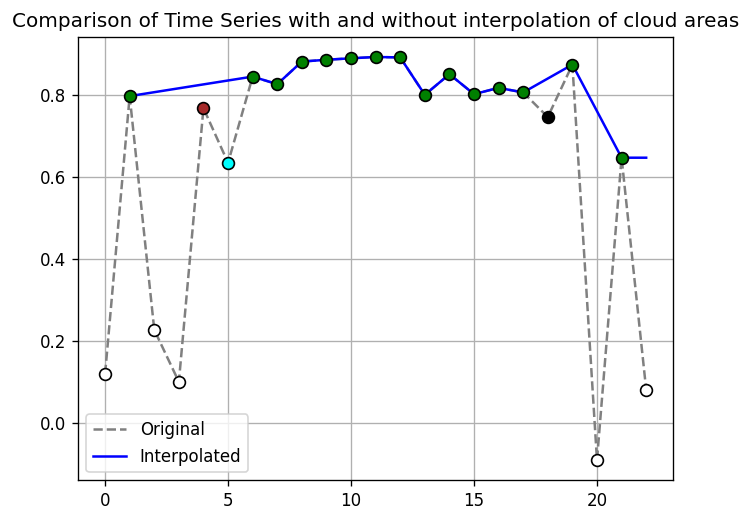

In [119]:
plt.figure(dpi = 120)

plt.plot(example_point['NDVI'].values, color='gray', linestyle='dashed', label = 'Original')
plt.plot(example_interpolated.values, color='blue', label = 'Interpolated')

scl_colors = {
    '0': 'black',  #Nodata
    '1': 'red',    #Saturated or defective
    '2': 'gray',   #Dark area pixels
    '3': 'brown',  #Cloud Shadow
    '4': 'green',  #Vegetation
    '5': 'yellow', #Not Vegetated
    '6': 'blue',   #Water
    '7': 'red',    #Unclassified
    '8': 'white',  #Cloud Medium Probability
    '9': 'white',  #Cloud High Probability
    '10': 'cyan',  #Thin Cirrus
    '11': 'pink'   #Snow
}

# Add colored markers for each point based on SCL
for idx, scl_value in enumerate(example_point['SCL']):
    color = scl_colors[str(int(scl_value))]
    plt.scatter(idx, example_point['NDVI'].values[idx], edgecolor='black', color=color, s=50, zorder=5)

plt.title('Comparison of Time Series with and without interpolation of cloud areas')
plt.legend()
plt.grid(True)
plt.show()

Now let's do this for all time series in the dataframe.

In [123]:
def interpolate_clouds(df_row):
    for band in attributes:
        temp_array = df_row[band]
        positions_to_mask = np.where(np.isin(df_row['SCL'], values_to_fill), np.nan, 1)
        temp_array = temp_array * positions_to_mask
        df_row[band] = temp_array.interpolate()  # Use the row to assign interpolated values
    return df_row

interpolated_df = interpolated_df.apply(interpolate_clouds, axis=1)
interpolated_df

attribute                                         geometry  \
0            POINT (-52.36246233558581 -6.429924590603981)   
1            POINT (-52.36237100564034 -6.429924066711414)   
2            POINT (-52.36246287018578 -6.429835092415896)   
3            POINT (-52.3624634047854 -6.4297455942139825)   
4            POINT (-52.36237207489957 -6.429745070321687)   
...                                                    ...   
3053         POINT (-52.35753105524068 -6.429806760413744)   
3054          POINT (-52.35753051903072 -6.42989625859694)   
3055         POINT (-52.35762184895765 -6.429896784038004)   
3056         POINT (-52.35762131277715 -6.429986282207335)   
3057       POINT (-52.357529982820395 -6.4299857567661824)   

attribute                                           datetime  \
0          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
1          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
2          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
4          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
...                                                      ...   
3053       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3054       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3055       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3056       0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3057       0    2022-01-01
1    2022-01-17
2    2022-02-0...   

attribute                                                B01  \
0          0         NaN
1     0.02080
2     0.02594
3   ...   
1          0         NaN
1     0.02100
2     0.02610
3   ...   
2          0          NaN
1     0.021100
2     0.036833
3...   
3          0         NaN
1     0.02150
2     0.03720
3   ...   
4          0          NaN
1     0.021600
2     0.037167
3...   
...                                                      ...   
3053       0        NaN
1     0.0214
2     0.0264
3     0...   
3054       0         NaN
1     0.02110
2     0.02610
3   ...   
3055       0          NaN
1     0.020600
2     0.025667
3...   
3056       0          NaN
1     0.020200
2     0.025283
3...   
3057       0          NaN
1     0.020800
2     0.025783
3...   

attribute                                                B02  \
0          0         NaN
1     0.02000
2     0.02558
3   ...   
1          0         NaN
1     0.01990
2     0.02566
3   ...   
2          0         NaN
1     0.01960
2     0.03270
3   ...   
3          0         NaN
1     0.01990
2     0.03290
3   ...   
4          0         NaN
1     0.02190
2     0.03390
3   ...   
...                                                      ...   
3053       0         NaN
1     0.02940
2     0.03345
3   ...   
3054       0         NaN
1     0.02960
2     0.03365
3   ...   
3055       0        NaN
1     0.0279
2     0.0322
3     0...   
3056       0         NaN
1     0.02810
2     0.03210
3   ...   
3057       0         NaN
1     0.02910
2     0.03310
3   ...   

attribute                                                B03  \
0          0         NaN
1     0.02500
2     0.03428
3   ...   
1          0         NaN
1     0.02410
2     0.03296
3   ...   
2          0         NaN
1     0.02630
2     0.04130
3   ...   
3          0         NaN
1     0.02810
2     0.04240
3   ...   
4          0          NaN
1     0.025500
2     0.039533
3...   
...                                                      ...   
3053       0          NaN
1     0.036700
2     0.040083
3...   
3054       0          NaN
1     0.037500
2     0.041033
3...   
3055       0          NaN
1     0.035000
2     0.038667
3...   
3056       0          NaN
1     0.035300
2     0.039083
3...   
3057       0          NaN
1     0.037500
2     0.041017
3...   

attribute                                                B04  \
0          0         NaN
1     0.01300
2     0.01758
3   ...   
1          0         NaN
1     0.01290
2     0.0176

## Time Series Classification
<hr style="border:1px solid #0077b9;">

Now, let's perform a classification using the data we obtained and prepared.
> ⚠️ **Atention:** This is a didatic example. Some classification approaches will prefer the input data without the interpolation we did.

First let's prepare our samples.

In [129]:
attributes = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'EVI', 'NDVI', 'NBR']
bands_and_cloudmask = attributes + ['SCL']

### You can use MultiPoint in WTSS to extract the time series as, but this will be improved in the next version, due to timeout
# multipoint = MultiPoint(samples_df['geometry'].tolist())
# time_series = coverage.ts(attributes=(bands_and_cloudmask),
#                  geom=multipoint,
#                  start_date='2022-01-01', end_date='2022-12-31')


start_df = True
i=1
for index, row in samples_df.iterrows():
    print(f"{i} of {len(samples_df)} ..")
    i+=1
    latitude, longitude = row['geometry'].y, row['geometry'].x
    sample_time_series = coverage.ts(attributes=(bands_and_cloudmask),
                                     latitude=float(latitude), longitude=float(longitude),
                                     start_date='2022-01-01', end_date='2022-12-31')
    temp_df = sample_time_series.df()

    #Move attributes to columns
    df_pivot = temp_df.pivot_table(index=['geometry', 'datetime'],
                           columns='attribute',
                           values='value').reset_index()
    #Group by points
    df_grouped = df_pivot.groupby('geometry').agg(lambda x: list(x)).reset_index()
    #Transform cells to numpy.arrays or pandas.Series
    columns_to_convert = df_grouped.columns.difference(['geometry'])
    df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)
    df_grouped['Label'] = row['Label']
    if start_df:
        ts_df = df_grouped.copy()
        start_df = False
    else:
        ts_df = pd.concat([ts_df, df_grouped], ignore_index=True)
ts_df

1 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


2 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


3 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


4 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


5 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


6 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


7 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


8 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


9 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


10 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


11 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


12 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


13 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


14 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


15 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


16 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


17 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


18 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


19 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


20 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


21 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


22 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


23 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


24 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


25 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


26 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


27 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


28 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


29 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


30 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


31 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


32 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


33 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


34 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


35 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


36 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


37 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


38 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


39 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


40 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


41 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


42 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


43 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


44 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


45 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


46 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


47 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


48 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


49 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


50 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


51 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


52 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


53 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


54 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


55 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


56 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


57 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


58 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


59 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


60 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


61 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


62 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


63 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


64 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


65 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


66 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


67 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


68 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


69 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


70 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


71 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


72 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


73 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


74 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


75 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


76 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


77 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


78 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


79 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


80 of 80 ..


<ipython-input-129-9bcfc45f0c7f>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped[columns_to_convert] = df_grouped[columns_to_convert].applymap(pd.Series)


attribute                    geometry  \
0          POINT (-52.40124 -6.37313)   
1           POINT (-52.3922 -6.37317)   
2          POINT (-52.38316 -6.37312)   
3          POINT (-52.37412 -6.37316)   
4          POINT (-52.36508 -6.37319)   
..                                ...   
75         POINT (-52.35621 -6.43651)   
76         POINT (-52.34717 -6.43655)   
77         POINT (-52.33813 -6.43659)   
78         POINT (-52.32908 -6.43662)   
79         POINT (-52.32004 -6.43666)   

attribute                                           datetime  \
0          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
1          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
2          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
3          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
4          0    2022-01-01
1    2022-01-17
2    2022-02-0...   
..                                                       ...   
75         0    2022-01-01
1    2022-01-17
2    2022-02-0...   
76         0    2022-01-01
1    2022-01-17
2    2022-02-0...   
77         0    2022-01-01
1    2022-01-17
2    2022-02-0...   
78         0    2022-01-01
1    2022-01-17
2    2022-02-0...   
79         0    2022-01-01
1    2022-01-17
2    2022-02-0...   

attribute                                                B01  \
0          0     0.3047
1     0.0268
2     0.0721
3     0...   
1          0     0.2770
1     0.0348
2     0.0810
3     0...   
2          0     0.3012
1     0.0347
2     0.1735
3     0...   
3          0     0.2949
1     0.0276
2     0.1862
3     0...   
4          0     0.0497
1     0.0240
2     0.6993
3     0...   
..                                                       ...   
75         0     0.2983
1     0.3728
2     0.1748
3     0...   
76         0     0.3597
1     0.0820
2     0.2081
3     0...   
77         0     0.4422
1     0.0730
2     0.2603
3     0...   
78         0     0.2409
1     0.0743
2     0.3539
3     0...   
79         0     0.2371
1     0.0365
2     0.2477
3     0...   

attribute                                                B02  \
0          0     0.3259
1     0.0271
2     0.0561
3     0...   
1          0     0.2384
1     0.0401
2     0.0762
3     0...   
2          0     0.3243
1     0.0397
2     0.1245
3     0...   
3          0     0.3513
1     0.0279
2     0.1837
3     0...   
4          0     0.0634
1     0.0274
2     0.6255
3     0...   
..                                                       ...   
75         0     0.2149
1     0.4458
2     0.2789
3     0...   
76         0     0.3307
1     0.2117
2     0.0891
3     0...   
77         0     0.4236
1     0.0531
2     0.3173
3     0...   
78         0     0.2657
1     0.0693
2     0.3010
3     0...   
79         0     0.2373
1     0.0439
2     0.2241
3     0...   

attribute                                                B03  \
0          0     0.3203
1     0.0460
2     0.0661
3     0...   
1          0     0.2332
1     0.0486
2     0.0840
3     0...   
2          0     0.3196
1     0.0546
2     0.1483
3     0...   
3          0     0.3381
1     0.0377
2     0.1776
3     0...   
4          0     0.0736
1     0.0420
2     0.5990
3     0...   
..                                                       ...   
75         0     0.2425
1     0.4268
2     0.2482
3     0...   
76         0     0.3273
1     0.1391
2     0.1077
3     0...   
77         0     0.4116
1     0.0580
2     0.2875
3     0...   
78         0     0.2652
1     0.0758
2     0.3014
3     0...   
79         0     0.2389
1     0.0599
2     0.2168
3     0...   

attribute                                                B04  \
0          0     0.3010
1     0.0248
2     0.0505
3     0...   
1          0     0.2170
1     0.0458
2     0.0752
3     0...   
2          0     0.2639
1     0.0563
2     0.1500
3     0...   
3          0     0.2998
1     0.0309
2     0.1604
3     0...   
4          0     0.0440
1     0.0236
2     0.5777
3     0...   
..                                             

Let's calculate the same index, and try to remove clouds of our time series:

In [125]:
ts_df['NDWI'] = ((ts_df['B03'] - ts_df['B05']) / (ts_df['B03'] + ts_df['B05']))
ts_df = ts_df.apply(interpolate_clouds, axis=1)

Let's remove from our samples, points of Water that had differences according to IBGE and mapbiomas.

In [126]:
print(len(ts_df))
ts_df = ts_df[ts_df['Label'] != "Talvez Agua"].reset_index(drop=True)
print(len(ts_df))

80
72


Now we have our samples Dataframe, called `ts_df` and the Dataframe of time series we want to classify, the `study_area_df`.

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def series_to_features(df):
    feature_list = []
    for col in df.columns:
        # Stack values
        col_values = df[col].apply(lambda series: series.values if isinstance(series, pd.Series) else series)
        feature_list.append(np.vstack(col_values))

    features = np.hstack(feature_list)
    return features

feature_columns = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B11', 'B12', 'B8A', 'EVI', 'NBR', 'NDVI', 'SCL']

X_samples = series_to_features(ts_df[feature_columns])
y_samples = ts_df['Label']

X_to_class = series_to_features(study_area_df[feature_columns])

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

X_train, X_val, y_train, y_val = train_test_split(X_samples, y_samples, test_size=0.2, random_state=42)
#pegando 20% para treinamento
pipeline.fit(X_train, y_train) #Train model

predicted_labels = pipeline.predict(X_to_class) #Use model to classify
study_area_df['Label'] = predicted_labels

study_area_df['Label']

0       Nao Agua
1       Nao Agua
2       Nao Agua
3       Nao Agua
4       Nao Agua
          ...   
3053        Agua
3054        Agua
3055        Agua
3056        Agua
3057        Agua
Name: Label, Length: 3058, dtype: object

In [128]:
f = folium.Figure(width=1000, height=300) # Restrict figure size

folium_map = folium.Map(location=[-6.4275, -52.36], zoom_start=17.2)

tile = folium.TileLayer(
        tiles = "https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}",
        attr = 'Google',
        name = 'Google Satellite',
        overlay = False,
        control = True
       ).add_to(folium_map)

for _, row in study_area_df.iterrows():
    point = row['geometry']

    marker_color = 'blue' if row['Label'] == "Agua" else 'gray'

    folium.CircleMarker(
        location=(point.y, point.x),
        radius=2,
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.5,
        popup='Sample'
    ).add_to(folium_map)
folium_map